## 1.1 Set up an environment for collaborative development

- I used PyCharm with Jupyter Notebook and PIP
- Registered an Azure Windows Data Science Virtual Machine (DSVM) 

## 1.2 Explore Image Data

Iterate through the folders of images and display the first image in each folder with the name of the folder 
(category/class, of product shown in the image)

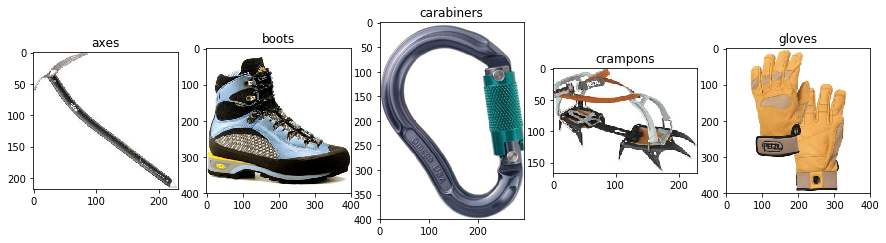

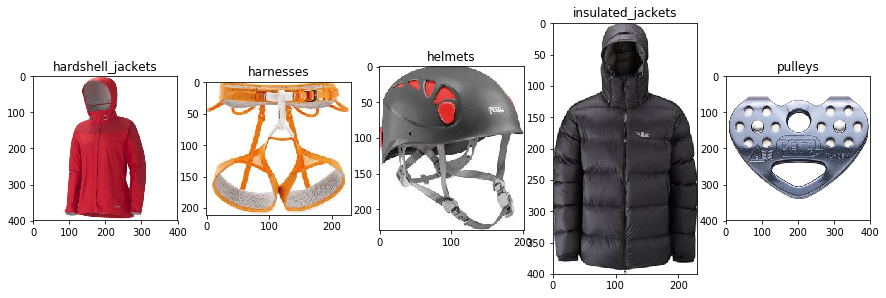

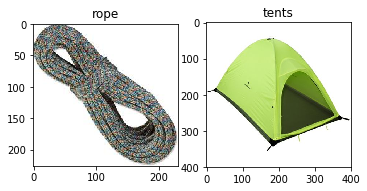

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# display img plots as a grid
def grid_display(list_of_images, list_of_titles=[], no_of_columns=2, figsize=(5,5)):
    fig = plt.figure(figsize=figsize)
    column = 0
    for i in range(len(list_of_images)):
        column += 1
        #  check for end of column and create a new figure
        if column == no_of_columns+1:
            fig = plt.figure(figsize=figsize)
            column = 1
        fig.add_subplot(1, no_of_columns, column)
        plt.imshow(list_of_images[i])
        if len(list_of_titles) >= len(list_of_images):
            plt.title(list_of_titles[i])
            

root_dir = os.path.join(os.getcwd(), "gear_images") 
images=[] #list of imgs
titles=[] #list of imgs' titles

# loop over images in sub-folders
for root, dirs, files in os.walk(root_dir):
    
    # loop over images in each sub-folder
    for file_ in files:
        imgPath = os.path.join(root, file_)  # ..\PyClassifier\gear_images\axes\100172.jpeg
        category = os.path.basename(root)     # axes

        img = Image.open(imgPath)
        images.append(img)
        titles.append(category)
        break #only 1st img
        
grid_display(images, titles, 5, (15,15)) # show 5 imgs per row


## 1.3 Pre-Process Image Data

In [3]:
%%time
# 1 Resizing imgs to 128x128, keeping their aspect ratio, and white padding any extra background
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# create dir if it doesn't exist 
def mkdir_p(directory):
    if not os.path.isdir(directory):
        os.makedirs(directory)

# resize img with white padding
def resize_with_padding(img, desired_size):
    old_size = img.size  # old_size[0] is in (width, height) format
    ratio = float(desired_size) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])
    img = img.resize(new_size, Image.ANTIALIAS)

    delta_w = desired_size - new_size[0]
    delta_h = desired_size - new_size[1]
    padding = (delta_w // 2, delta_h // 2, delta_w - (delta_w // 2), delta_h - (delta_h // 2))

    resized_image = ImageOps.expand(img, padding, (255, 255, 255))  
    return resized_image

# getting imgs from "gear_images" folder, and saving them to the training folder "./dataset/train"
root_dir = os.path.join(os.getcwd(), "gear_images") 
save_dir = os.path.join(os.getcwd(), "dataset", "train") 
mkdir_p(save_dir)
desired_size = 128

#looping through all imgs
for root, dirs, files in os.walk(root_dir):
    dirName = os.path.basename(root)  # axes
    print("Processing Folder: " + dirName)
    
    for file_ in files:
        imgPath = os.path.join(root, file_)  # ..\PyClassifier\gear_images\axes\100172.jpeg
 
        output_image_dir = os.path.join(save_dir, dirName)   
        mkdir_p(output_image_dir)

        output_image_path = os.path.join(output_image_dir, file_)   
        img = Image.open(imgPath)

        resized_image = resize_with_padding(img, desired_size)
        resized_image.save(output_image_path)
print("Done!")

Processing Folder: gear_images
Processing Folder: axes
Processing Folder: boots
Processing Folder: carabiners
Processing Folder: crampons
Processing Folder: gloves
Processing Folder: hardshell_jackets
Processing Folder: harnesses
Processing Folder: helmets
Processing Folder: insulated_jackets
Processing Folder: pulleys
Processing Folder: rope
Processing Folder: tents
Done!
Wall time: 23.5 s


Wall time: 904 ms


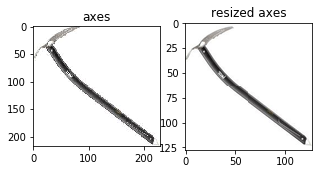

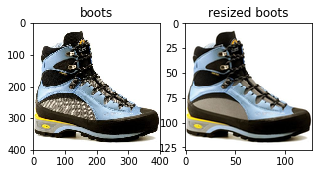

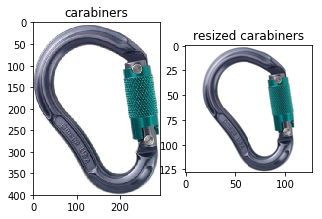

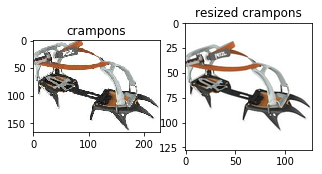

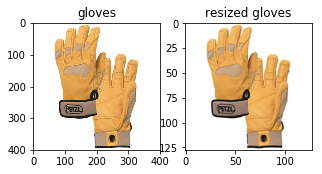

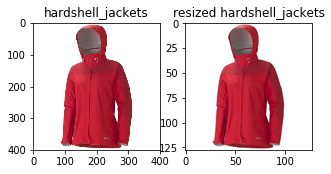

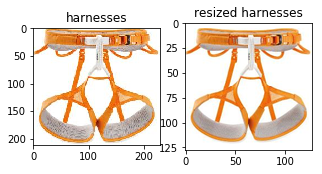

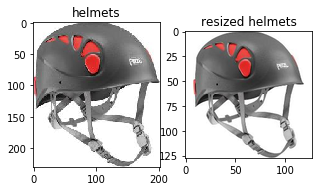

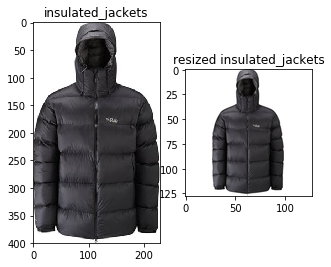

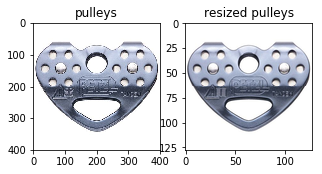

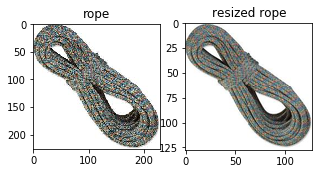

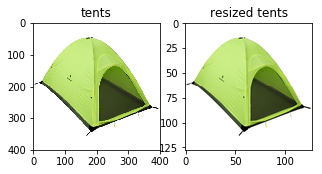

In [4]:
%%time
# 2 Display the first image in each folder along with its resized counterpart
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

root_dir = os.path.join(os.getcwd(), "gear_images") 
desired_size = 128

#loop through all imgs in the "gear_images" folder
for root, dirs, files in os.walk(root_dir):
    for file_ in files:
        imgPath = os.path.join(root, file_)  # ..\PyClassifier\gear_images\axes\100172.jpeg
        dirName = os.path.basename(root)  # axes

        img = Image.open(imgPath)

        f = plt.figure(figsize=[5,5])
        f.add_subplot(1, 2, 1)
        plt.imshow(img)
        plt.title(dirName)

        f.add_subplot(1, 2, 2)
        new_im = resize_with_padding(img, desired_size)
        plt.imshow(new_im)
        plt.title("resized " + dirName)

        break  # to only plot 1st img in the folder
